In [8]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

df=pd.read_csv('PATH AND FILE', encoding='CP949')
font_name = font_manager.FontProperties(fname="PATH AND FONT").get_name()
rc('font', family=font_name)

df=df.drop(df[(df['gameduration']<=900)].index)
df

,idx,area,pick_1,pick_2,pick_3,pick_4,pick_5,gameduration,first_blood,first_tower,tower_kills,first_inhibitor,first_rift,first_dragon,dragon_kills,first_baron,baron_kills,result
0,0,100,38,497,164,19,145,1514,True,True,2,False,True,False,1,False,0,Fail
1,1,200,114,876,4,57,21,1514,False,False,5,False,False,True,2,True,1,Win
2,2,100,64,22,99,131,57,2004,True,False,4,False,True,True,1,False,0,Fail
3,3,200,120,67,117,84,516,2004,False,True,6,True,False,False,4,True,1,Win
4,4,100,39,25,64,51,517,1610,True,False,1,False,True,False,0,False,0,Fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339657,339657,200,102,84,236,201,43,1964,False,False,5,True,False,True,2,False,1,Win
339658,339658,100,202,412,76,39,240,2362,True,True,8,True,True,False,4,True,2,Win
339659,339659,200,41,2,99,235,7,2362,False,False,3,False,False,True,2,False,0,Fail
339660,339660,100,875,30,91,51,114,2043,False,False,6,True,False,False,1,False,0,Fail


In [9]:
#이즈리얼 모델 생성, gameduration 0=초중반(15~30), 1=중후반(30~), area 0=red, 1=blue
ezreal=df[(df['pick_1']==81) | (df['pick_2']==81) | (df['pick_3']==81) | (df['pick_4']==81) | (df['pick_5']==81)]
ezreal_model=ezreal.drop(['idx','pick_1','pick_2','pick_3','pick_4','pick_5'], axis=1)
ezreal_model['area']=ezreal_model['area'].apply(lambda x: 0 if x == 100 else 1)
ezreal_model['result']=ezreal_model['result'].apply(lambda x: 0 if x == 'Fail' else 1)
ezreal_model['first_blood']=ezreal_model['first_blood'].apply(lambda x: 0 if x ==  False else 1)
ezreal_model['first_tower']=ezreal_model['first_tower'].apply(lambda x: 0 if x ==  False else 1)
ezreal_model['first_inhibitor']=ezreal_model['first_inhibitor'].apply(lambda x: 0 if x ==  False else 1)
ezreal_model['first_rift']=ezreal_model['first_rift'].apply(lambda x: 0 if x ==  False else 1)
ezreal_model['first_dragon']=ezreal_model['first_dragon'].apply(lambda x: 0 if x ==  False else 1)
ezreal_model['first_baron']=ezreal_model['first_baron'].apply(lambda x: 0 if x ==  False else 1)
ezreal_model['gameduration']=ezreal_model['gameduration'].apply(lambda x: 0 if x <= 1800 else 1)

ezreal_model

,area,gameduration,first_blood,first_tower,tower_kills,first_inhibitor,first_rift,first_dragon,dragon_kills,first_baron,baron_kills,result
6,0,0,0,0,0,0,0,0,0,0,0,0
17,1,1,1,1,3,0,0,1,4,0,0,0
22,0,0,0,0,7,1,0,1,4,1,1,1
29,1,0,0,0,0,0,0,0,0,0,0,0
30,0,0,1,1,4,0,1,1,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
339620,0,0,1,0,1,0,0,0,0,0,0,0
339630,0,1,0,0,7,1,0,0,3,0,0,1
339632,0,1,1,0,4,0,0,0,2,0,0,0
339635,1,0,1,1,3,0,0,1,2,0,0,1


C:\Users\User\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


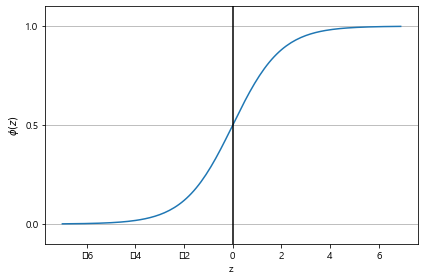

In [70]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))
    
z = np.arange(-7, 7, 0.1) # -7에서 7까지 0.1씩 증가하는 데이터
phi_z = sigmoid(z) # 위 데이터를 sigmoid에 대입한 결과값

# 플롯 그리기
plt.plot(z, phi_z)
plt.axvline(0.0, color='k') # x축 0.0부분에 수직선 긋기
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y축 격자선 및 눈금
plt.yticks([0.0, 0.5, 1.0]) 
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

In [10]:
ezreal_model.area=ezreal_model.area.astype("category")
ezreal_model.gameduration=ezreal_model.gameduration.astype("category")
ezreal_model.first_blood=ezreal_model.first_blood.astype("category")
ezreal_model.first_tower=ezreal_model.first_tower.astype("category")
ezreal_model.first_inhibitor=ezreal_model.first_inhibitor.astype("category")
ezreal_model.first_rift=ezreal_model.first_rift.astype("category")
ezreal_model.first_dragon=ezreal_model.first_dragon.astype("category")
ezreal_model.first_baron=ezreal_model.first_baron.astype("category")
ezreal_model.result=ezreal_model.result.astype("category")

ezreal_model.dtypes

area               category
gameduration       category
first_blood        category
first_tower        category
tower_kills           int64
first_inhibitor    category
first_rift         category
first_dragon       category
dragon_kills          int64
first_baron        category
baron_kills           int64
result             category
dtype: object

In [211]:
ezreal_model

,area,gameduration,first_blood,first_tower,tower_kills,first_inhibitor,first_rift,first_dragon,dragon_kills,first_baron,baron_kills,result
6,0,0,0,0,0,0,0,0,0,0,0,0
17,1,1,1,1,3,0,0,1,4,0,0,0
22,0,0,0,0,7,1,0,1,4,1,1,1
29,1,0,0,0,0,0,0,0,0,0,0,0
30,0,0,1,1,4,0,1,1,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
339620,0,0,1,0,1,0,0,0,0,0,0,0
339630,0,1,0,0,7,1,0,0,3,0,0,1
339632,0,1,1,0,4,0,0,0,2,0,0,0
339635,1,0,1,1,3,0,0,1,2,0,0,1


In [100]:
# from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#데이터 세트
features=ezreal_model[['area',
                       'gameduration',
                       'first_blood',
                       'first_tower',
                       'first_rift',
                       'dragon_kills',
                       'baron_kills'
                      ]]
result=ezreal_model['result']

#모델 생성
# model = LogisticRegression()
model=SGDClassifier(max_iter=10000, loss='log')
model.fit(train_features, train_labels)


#학습세트와 평가세트로 분리
train_features, test_features, train_labels, test_labels = train_test_split(features, result)

#정규화 스케일링
#fit: 각 속성(feature)마다 컬럼을 만드는 작업
#transform: fit이후 데이터 변형
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)


#평가(학습 세트로 정확도 확인)
print(model.score(train_features, train_labels))

#분리해놓은 테스트 세트에서의 정확도 확인
print(model.score(test_features, test_labels))

#각 변수마다 승리에 큰 영향을 끼치는 지 확인
print(model.coef_)

0.8527190855559404
0.8574298579840665
[[-0.04265722 -1.1632051   0.06817749  0.84174928  0.14281812  1.65930449
   1.31142913]]


In [101]:
import numpy as np

#진영, 게임시간, 퍼블, 포블, 첫전, 용수, 바론수
#4용을 선택하였을 때
test1=np.array([0,1,1,1,0,4,0])
#바론을 선택하였을 때
test2=np.array([0,1,1,1,0,3,1])

tests=np.array([test1, test2])
tests=scaler.transform(tests)

#예측
print(model.predict(tests))
print(model.predict_proba(tests))

[1 1]
[[0.21190767 0.78809233]
 [0.09167218 0.90832782]]
